<a href="https://colab.research.google.com/github/Baisalis/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:

import pandas as pd
import numpy as np
import math

In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [0]:
# mean
def mean(samp):
  return sum(samp)/len(samp)

In [0]:
# variance
def variance(samp):
  return sum([(i - mean(samp))**2 for i in samp])/(len(samp)-1)

In [0]:

# standard deviation
def stdev(samp):
  return math.sqrt(variance(samp))

In [7]:
# mean
print('mean:' , mean(sales))
print('numpy mean:' , np.mean(sales))

mean: 3052.714285714286
numpy mean: 3052.714285714286


In [8]:
# variance
print('variance:' , variance(sales))
print('numpy variance:' , np.var(sales, ddof=1))

variance: 214387.90476190473
numpy variance: 214387.90476190473


In [9]:
# standard deviation:
print('standard deviation:' , stdev(sales))
print('numpy standard deviation:' , np.std(sales, ddof=1))

standard deviation: 463.0204150595357
numpy standard deviation: 463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
import matplotlib.pyplot as plt

In [0]:
sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
customers = np.array([127, 80, 105, 92, 120, 115, 93])

In [0]:
data = {'sales': sales, 'customers': customers}
df = pd.DataFrame(data)

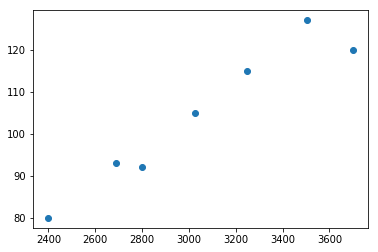

In [13]:
plt.scatter(df.sales, df.customers)

In [14]:
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [15]:
print('mean:' , mean(customers))
print('variance:',variance(customers))
print('standard deviation:' , stdev(customers))

mean: 104.57142857142857
variance: 290.95238095238096
standard deviation: 17.057326313123664


In [16]:
print('standard deviation:' , stdev(sales))

standard deviation: 463.0204150595357


In [0]:
# correlation coefficient:
def corr_coeff(samp1, samp2):
  return (np.cov(sales, customers, ddof=1)/((stdev(sales))*(stdev(customers))))

In [18]:
print(corr_coeff(sales, customers))
np.corrcoef(sales, customers)

[[27.14495851  0.96283398]
 [ 0.96283398  0.03683925]]


array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [19]:
df.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [20]:
titanic_url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic = pd.read_csv(titanic_url)
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [21]:
titanic.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [22]:
columns = ['Unnamed: 0', 'pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 
           'body', 'has_cabin_number']
subset = titanic[columns]
subset.head()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
0,1,1.0,1.0,29.0000,0.0,0.0,211.3375,NaN,1
1,2,1.0,1.0,0.9167,1.0,2.0,151.5500,NaN,1
2,3,1.0,0.0,2.0000,1.0,2.0,151.5500,NaN,1
3,4,1.0,0.0,30.0000,1.0,2.0,151.5500,135.0,1
4,5,1.0,0.0,25.0000,1.0,2.0,151.5500,NaN,1


In [23]:
# variance, covariance matrix:
subset.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [24]:
# correlation matrix:
subset.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

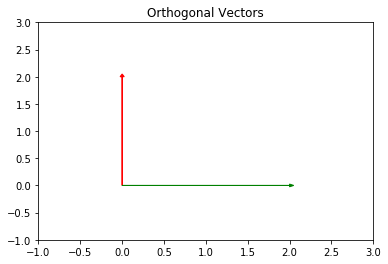

In [25]:
vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [26]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
np.dot(a, b)
# if the dot product = 0 then it's orthogonal, so these two vectors aren't.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = np.array([2, -15, 6, 20])

In [28]:
#||c||**2 which is norm(length) of a vector squared
np.linalg.norm(c)**2

665.0

In [29]:
# c dot c is dot product:
np.dot(c, c)

665

In [30]:
# c transpose c:
cT = c.T
np.matmul(cT, c)

665

In [0]:
# all same values

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}


$$\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 
7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 
12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 
7\hat{i} + 12\hat{j}
\end{align}$$
$$\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 
2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 
11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} +
-8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} =
2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [32]:
f = np.array([4, 12, 11, 9, 2])
norm = np.linalg.norm(f)
print('norm:' , norm)

norm: 19.131126469708992


In [33]:
# divide vector by the norm:
f_hat = f/norm
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



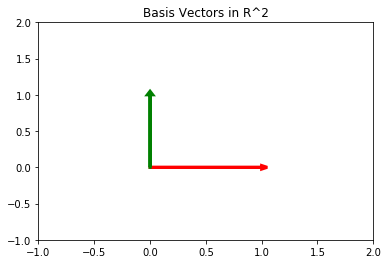

In [35]:
i_hat = [1, 0]
j_hat = [0, 1]
# plot
plt.xlim(-1,2)          
plt.ylim(-1,2)
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.title("Basis Vectors in R^2")
plt.show()

## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [37]:

P = np.array([[1, 2, 3],
              [-1, 0, 7],
              [4, 8, 2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

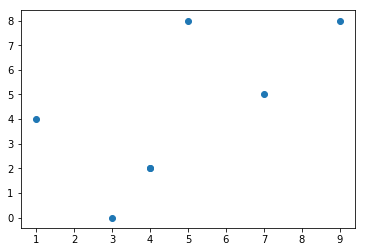

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()